<a href="https://colab.research.google.com/github/rfortuna98/QNC-Fall-2025/blob/main/laterTutorial_fitModelToDataExercise_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

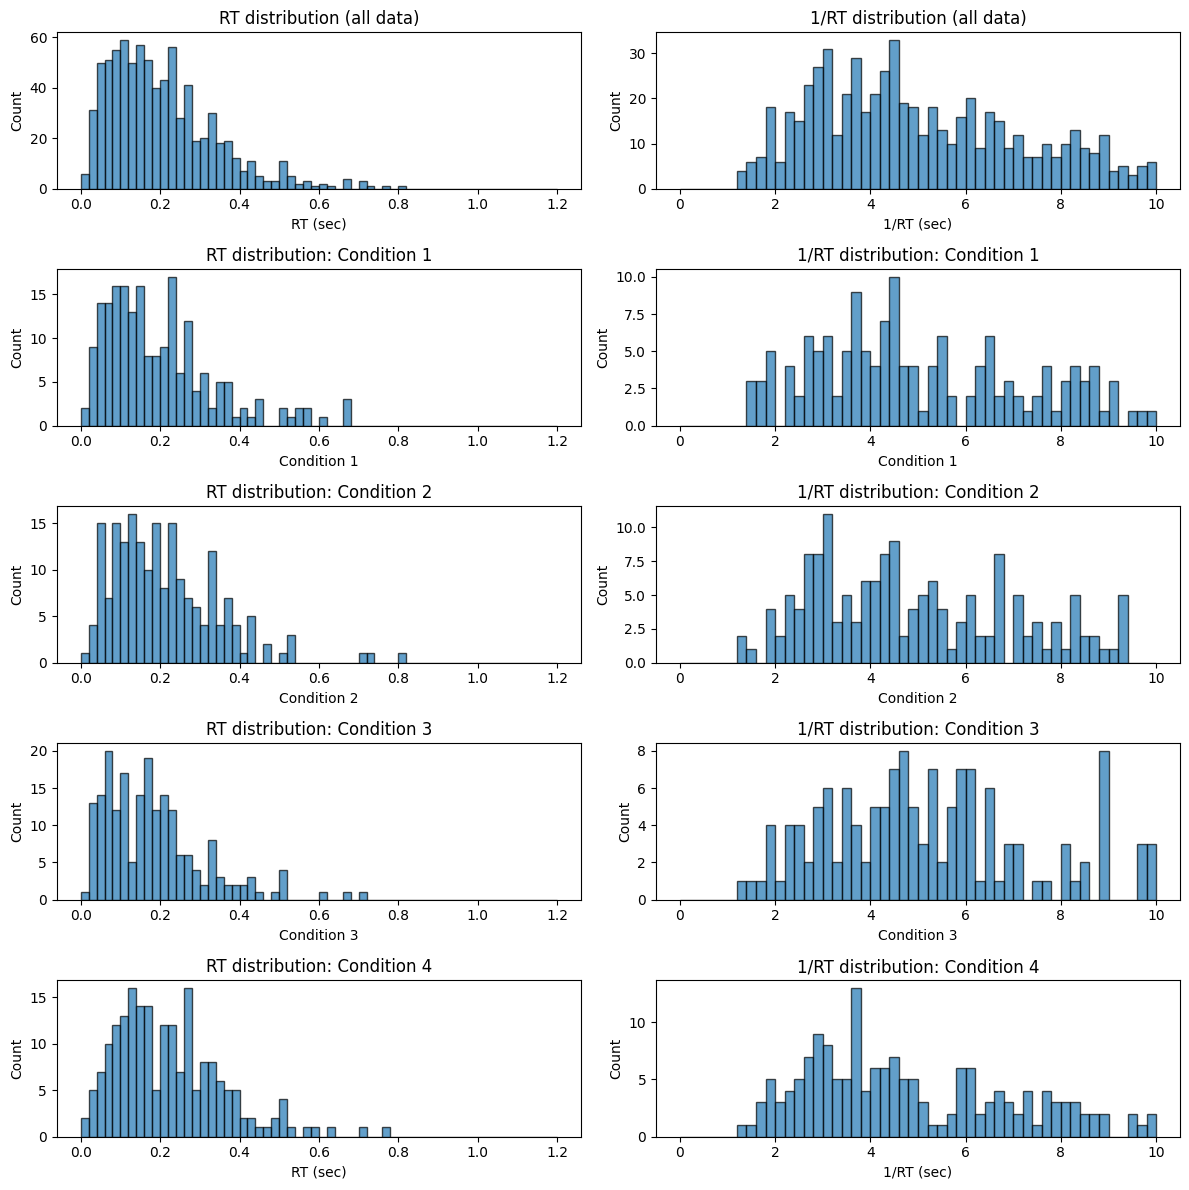

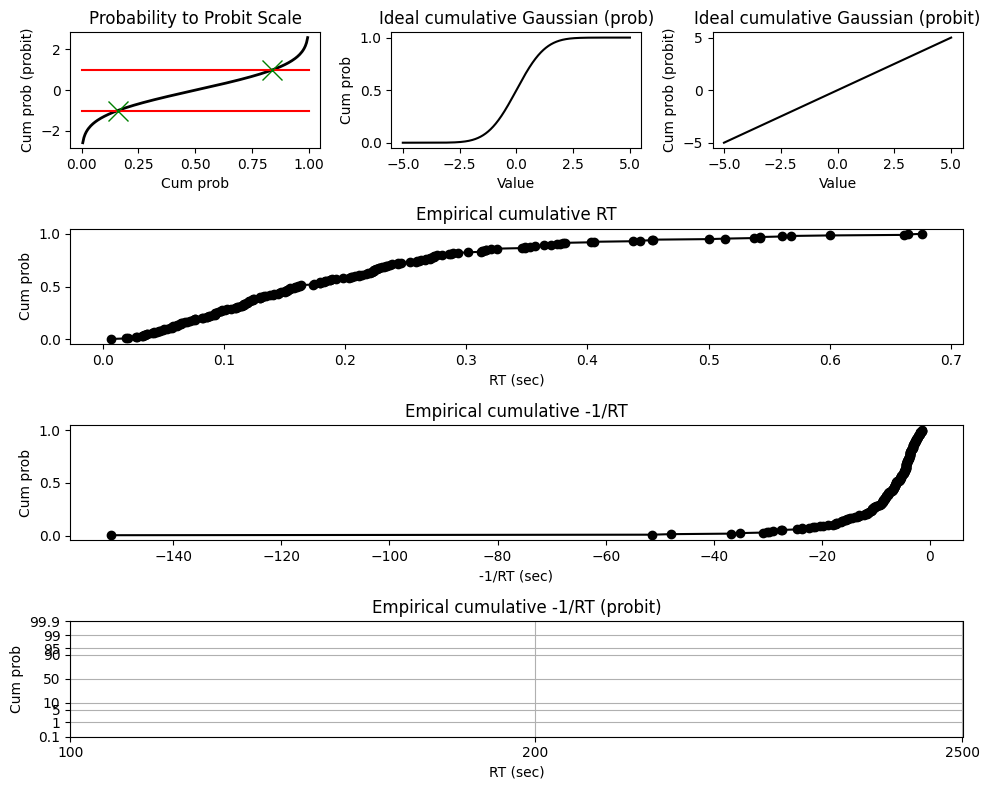

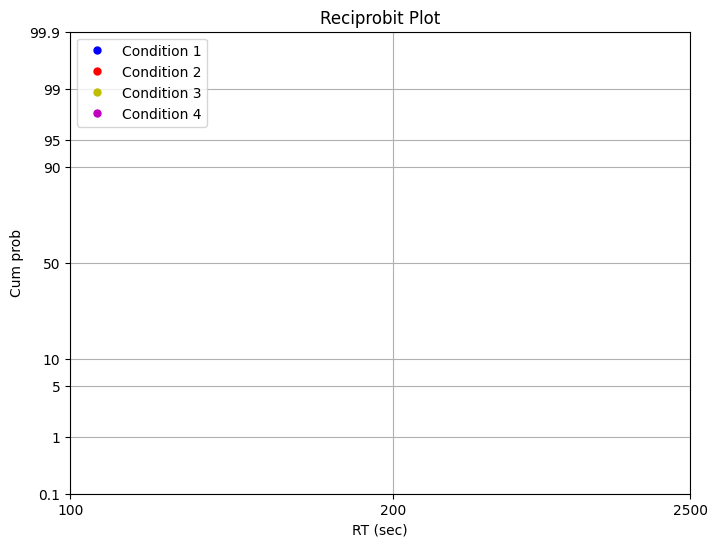

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate or load your actual RT data here:
# This should mimic [data, labels] = later_getData() in MATLAB
# For example, let's create 4 sets of RTs and labels:
np.random.seed(0)  # for reproducibility

labels = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4']
data = [
    np.random.gamma(shape=2.0, scale=0.1, size=200),  # sample RTs for condition 1
    np.random.gamma(shape=2.5, scale=0.09, size=200), # condition 2
    np.random.gamma(shape=1.8, scale=0.11, size=200), # condition 3
    np.random.gamma(shape=2.2, scale=0.1, size=200)   # condition 4
]

def plot_histogram(data_array, bins, xlabel):
    plt.hist(data_array, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlabel(xlabel)
    plt.ylabel('Count')

# 1. Plot RT and 1/RT distributions (all data combined and individual conditions)

rt_bins = np.arange(0, 1.21, 0.02)
rrt_bins = np.arange(0, 10.1, 0.2)

plt.figure(figsize=(12, 12))

# TOP: All trials combined
plt.subplot(5, 2, 1)
plot_histogram(np.hstack(data), rt_bins, 'RT (sec)')
plt.title('RT distribution (all data)')

plt.subplot(5, 2, 2)
plot_histogram(1 / np.hstack(data), rrt_bins, '1/RT (sec)')
plt.title('1/RT distribution (all data)')

# Loop through each condition
for ii in range(len(labels)):
    plt.subplot(5, 2, 3 + 2*ii)
    plot_histogram(data[ii], rt_bins, labels[ii])
    plt.title(f'RT distribution: {labels[ii]}')

    plt.subplot(5, 2, 4 + 2*ii)
    plot_histogram(1 / data[ii], rrt_bins, labels[ii])
    plt.title(f'1/RT distribution: {labels[ii]}')

# Add labels at bottom
plt.subplot(5, 2, 9)
plt.ylabel('Count')
plt.xlabel('RT (sec)')
plt.subplot(5, 2, 10)
plt.xlabel('1/RT (sec)')
plt.tight_layout()
plt.show()

# 2. Build Reciprocity Plot (Reciprobit plot example)
plt.figure(figsize=(10, 8))

# Take first data set as example
rts = data[0]
rts_sorted = np.sort(rts)
n = len(rts_sorted)
cum_prob = np.arange(1, n+1) / n

probit_cum_prob = norm.ppf(cum_prob)

# 1a. Probability -> probit scale conversion
plt.subplot(4, 3, 1)
plt.plot(cum_prob, probit_cum_prob, 'k-', linewidth=2)
plt.plot([0, 1], [-1, -1], 'r-')
plt.plot([0, 1], [1, 1], 'r-')
plt.plot(0.5 + np.array([-0.34, 0.34]), [-1, 1], 'gx', markersize=15)
plt.xlabel('Cum prob')
plt.ylabel('Cum prob (probit)')
plt.title('Probability to Probit Scale')

# 1b. Ideal cumulative Gaussian on probability scale
x = np.arange(-5, 5.01, 0.01)
plt.subplot(4, 3, 2)
plt.plot(x, norm.cdf(x), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob')
plt.title('Ideal cumulative Gaussian (prob)')

# 1c. Ideal cumulative Gaussian on probit scale (straight line)
plt.subplot(4, 3, 3)
plt.plot(x, norm.ppf(norm.cdf(x)), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob (probit)')
plt.title('Ideal cumulative Gaussian (probit)')

# 2. Empirical cumulative RT distribution
plt.subplot(4, 1, 2)
plt.plot(rts_sorted, cum_prob, 'ko-')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.title('Empirical cumulative RT')

# 3. Empirical cumulative -1/RT distribution
plt.subplot(4, 1, 3)
plt.plot(-1 / rts_sorted, cum_prob, 'ko-')
plt.xlabel('-1/RT (sec)')
plt.ylabel('Cum prob')
plt.title('Empirical cumulative -1/RT')

# 4. Empirical cumulative -1/RT on probit scale
plt.subplot(4, 1, 4)
plt.plot(-1 / rts_sorted, probit_cum_prob, 'ko')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.title('Empirical cumulative -1/RT (probit)')
plt.grid(True)

# Configure x and y ticks like MATLAB version
express_cutoff = 200  # milliseconds, MATLAB used 200 ms as express cutoff
# Convert ms to sec (for the ticks)
XTickLabels = [100, express_cutoff, 2500]
XTickValues = -1000 / np.array(XTickLabels) / 1000  # convert ms to sec then reciprocal

YTickLabels = [0.1, 1, 5, 10, 50, 90, 95, 99, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)

plt.gca().set_yticks(YTickValues)
plt.gca().set_yticklabels(YTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.gca().set_xticks(XTickValues)
plt.gca().set_xticklabels(XTickLabels)
plt.xlim(XTickValues[0], XTickValues[-1])

plt.tight_layout()
plt.show()

# 3. Reciprobit plot for all 4 conditions
plt.figure(figsize=(8, 6))
colors = ['b', 'r', 'y', 'm']
express_cutoff_sec = 0.2  # seconds

plot_handles = []
for ii in range(len(labels)):
    rts_sorted = np.sort(data[ii])
    n = len(rts_sorted)
    cum_prob = np.arange(1, n + 1) / n
    probit_cum_prob = norm.ppf(cum_prob)

    Lexpress = rts_sorted < express_cutoff_sec

    plt.plot(-1 / rts_sorted[Lexpress], probit_cum_prob[Lexpress], 'x', color=colors[ii], markersize=10)
    handle, = plt.plot(-1 / rts_sorted[~Lexpress], probit_cum_prob[~Lexpress], 'o',
                       color=colors[ii], markerfacecolor=colors[ii], markersize=5)
    plot_handles.append(handle)

plt.gca().set_yticks(YTickValues)
plt.gca().set_yticklabels(YTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.gca().set_xticks(XTickValues)
plt.gca().set_xticklabels(XTickLabels)
plt.xlim(XTickValues[0], XTickValues[-1])

plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.grid(True)
plt.legend(plot_handles, labels, loc='upper left')
plt.title('Reciprobit Plot')

plt.show()


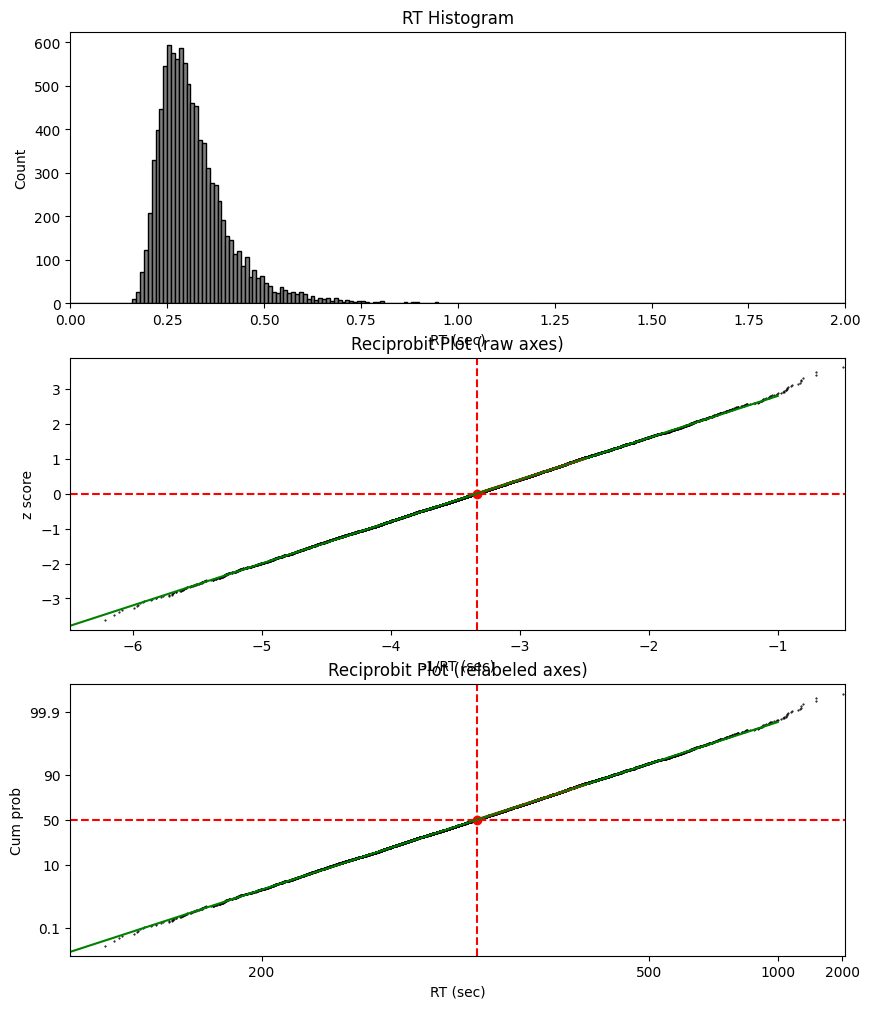

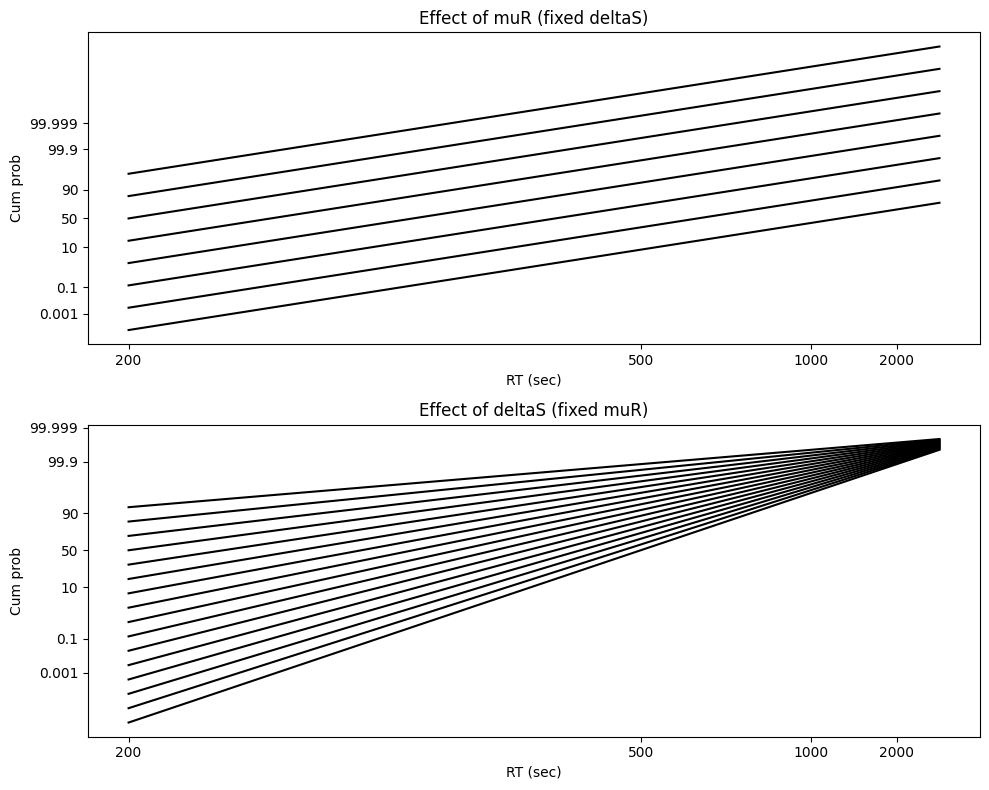

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# -------------------------------
# Parameters
muR = 4      # Mean of rise rate
stdR = 1     # Std of rise rate (fixed)
deltaS = 1.2 # Distance to threshold
N = 10000    # Number of simulated trials

# -------------------------------
# Simulate RTs
rise_rates = np.random.normal(muR, stdR, N)
RT = deltaS / rise_rates

# Remove invalid RTs (zero or negative)
RT = RT[RT > 0]

# -------------------------------
# Plot RT Histogram
plt.figure(figsize=(10, 12))

plt.subplot(3, 1, 1)
plt.hist(RT, bins=np.arange(0, 2.01, 0.01), color='gray', edgecolor='black')
plt.xlim([0, 2.0])
plt.xlabel('RT (sec)')
plt.ylabel('Count')
plt.title('RT Histogram')

# -------------------------------
# Compute reciprobit values
sorted_RT = np.sort(RT)
x_values = -1 / sorted_RT

# Avoid norm.ppf(0) or (1) by using midpoint of bin (0.5/N to 1 - 0.5/N)
N_valid = len(sorted_RT)
p_values = (np.arange(1, N_valid + 1) - 0.5) / N_valid
y_values = norm.ppf(p_values)

# Calculate plot limits
xlm = [np.min(x_values), np.max(x_values)]
ylm = [np.min(y_values), np.max(y_values)]

# -------------------------------
# Plot raw reciprobit (z score)
plt.subplot(3, 1, 2)
plt.plot(x_values, y_values, 'k.', markersize=1)
plt.xlim(xlm)
plt.ylim(ylm)
plt.xlabel('-1/RT (sec)')
plt.ylabel('z score')
plt.title('Reciprobit Plot (raw axes)')

# -------------------------------
# Plot relabeled reciprobit
plt.subplot(3, 1, 3)
plt.plot(x_values, y_values, 'k.', markersize=1)
plt.xlim(xlm)
plt.ylim(ylm)

# X-axis ticks
XTickLabels = [200, 500, 1000, 2000]
XTickValues = [-1000 / x for x in XTickLabels]
plt.xticks(XTickValues, XTickLabels)

# Y-axis ticks (cum prob)
YTickLabels = [0.1, 10, 50, 90, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)
plt.yticks(YTickValues, YTickLabels)

plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.title('Reciprobit Plot (relabeled axes)')

# -------------------------------
# Add analytic LATER model line + intercepts
for idx in range(2):
    plt.subplot(3, 1, idx + 2)
    xIntercept = -muR / deltaS
    plt.axhline(0, color='r', linestyle='--')
    plt.axvline(xIntercept, color='r', linestyle='--')
    plt.plot(xIntercept, 0, 'ro')

    # 1 std increment in z-score
    plt.plot([xIntercept, xIntercept + 1/deltaS], [0, 1], 'r-', linewidth=2)

    # Analytic LATER model line
    xRT = np.linspace(0.1, 1.0, 100)
    reci_xRT = -1 / xRT
    plt.plot(reci_xRT, reci_xRT * deltaS + muR, 'g-', label='Analytic Line')

# -------------------------------
# Figure: Effects of muR and deltaS
plt.figure(figsize=(10, 8))

# Range for x axis
xRT = np.linspace(0.2, 4.0, 100)
reci_xRT = -1 / xRT

muRs = np.arange(1, 9)
deltaSs = np.arange(0.5, 2.01, 0.1)

# Fixed deltaS, vary muR
plt.subplot(2, 1, 1)
for mu in muRs:
    plt.plot(reci_xRT, reci_xRT * deltaS + mu, 'k-')
plt.title('Effect of muR (fixed deltaS)')

# Fixed muR, vary deltaS
plt.subplot(2, 1, 2)
for delta in deltaSs:
    plt.plot(reci_xRT, reci_xRT * delta + muR, 'k-')
plt.title('Effect of deltaS (fixed muR)')

# Relabel axes
for i in [1, 2]:
    plt.subplot(2, 1, i)
    plt.xticks(XTickValues, XTickLabels)
    YTickLabels = [0.001, 0.1, 10, 50, 90, 99.9, 99.999]
    YTickValues = norm.ppf(np.array(YTickLabels) / 100)
    plt.yticks(YTickValues, YTickLabels)
    plt.xlabel('RT (sec)')
    plt.ylabel('Cum prob')

plt.tight_layout()
plt.show()
